# Mohitha Bandi
# 22WU0105037
# DS - B

# Deep Learning LAB - 2
**Customer Churn Prediction using ANN**


# LAB2_MODULE 2
Customer Churn Prediction using ANN
This code contains two implementations of an Artificial Neural Network (ANN) for predicting customer churn.

# 📌 Overview
Customer churn prediction is an essential task for businesses to retain customers and reduce revenue loss. I have implement two versions of an ANN using TensorFlow/Keras:

1) Baseline Model (Simple ANN)

2) Regularized Model (with L2 Regularization, Dropout & Batch Normalization)

# 🚀 Dataset
We use a customer churn dataset (Churn_Modelling.csv) containing the following key features:

Categorical Variables: Geography, Gender
Numerical Variables: CreditScore, Age, Balance, etc.
Target Variable: Exited (1 = Churn, 0 = Retained)


1) Without Regularization

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5288 - loss: 0.7538 - val_accuracy: 0.6147 - val_loss: 0.6543
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6422 - loss: 0.6317 - val_accuracy: 0.7107 - val_loss: 0.5746
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7324 - loss: 0.5615 - val_accuracy: 0.7703 - val_loss: 0.5252
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7851 - loss: 0.5204 - val_accuracy: 0.7983 - val_loss: 0.4938
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7895 - loss: 0.5005 - val_accuracy: 0.8083 - val_loss: 0.4732
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8050 - loss: 0.4769 - val_accuracy: 0.8110 - val_loss: 0.4588
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8015 - loss: 0.4636 - val_accuracy: 0.8120 - val_loss: 0.4489
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8031 - loss: 0.4588 - val_accuracy: 0.8133 - val_

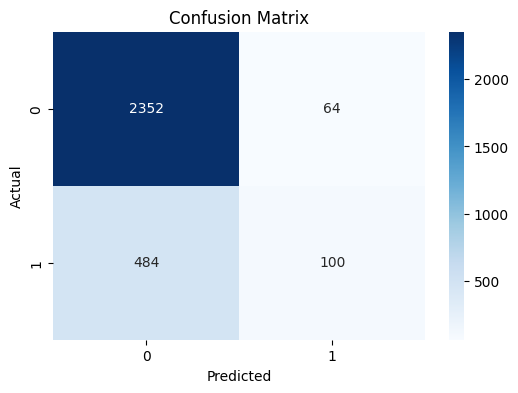

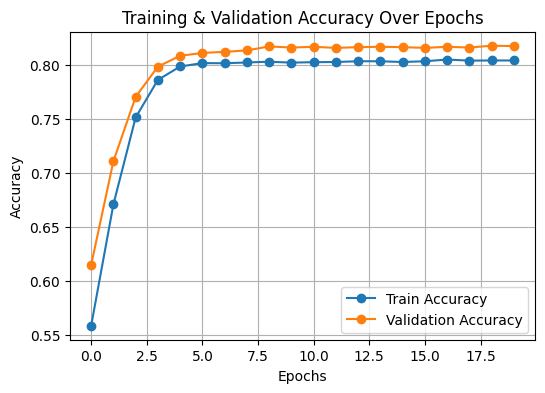

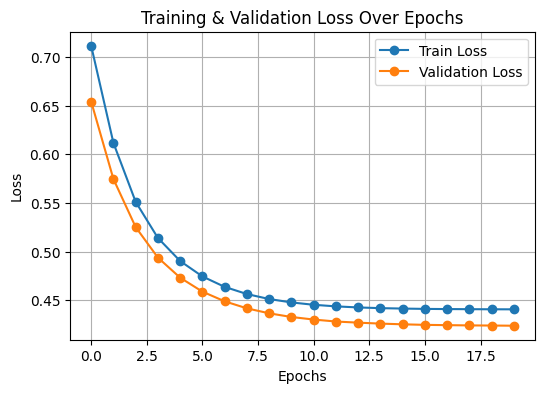

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset (Replace 'churn_data.csv' with your actual dataset file)
df = pd.read_csv("/content/Churn_Modelling.csv")

# Drop unnecessary columns
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ["Geography", "Gender"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Splitting features and target variable
X = df.drop(columns=["Exited"])  # Features
y = df["Exited"]  # Target (Churn)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build ANN model with ONLY input and output layers
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))  # No hidden layers
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# **Visualization**

# 1️⃣ Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 2️⃣ Training & Validation Accuracy Plot
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label="Train Accuracy", marker='o')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()

# 3️⃣ Training & Validation Loss Plot
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label="Train Loss", marker='o')
plt.plot(history.history['val_loss'], label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()


2) Using Regularization Technique

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6547 - loss: 3.8768 - val_accuracy: 0.7480 - val_loss: 1.3926
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6523 - loss: 3.6647 - val_accuracy: 0.7720 - val_loss: 1.5555
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6730 - loss: 3.3089 - val_accuracy: 0.7763 - val_loss: 1.5977
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6801 - loss: 3.0509 - val_accuracy: 0.7767 - val_loss: 1.5779
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6867 - loss: 3.0020 - val_accuracy: 0.7833 - val_loss: 1.6160
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6870 - loss: 2.9677 - val_accuracy: 0.7870 - val_loss: 1.5986
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6956 - loss: 2.7341 - val_accuracy: 0.7930 - val_loss: 1.6732
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6951 - loss: 2.7121 - val_accuracy: 0.7950 - val_

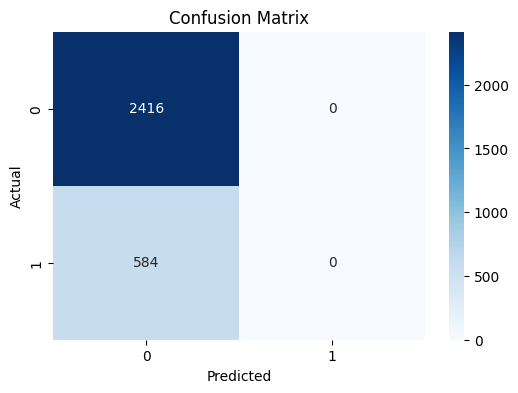

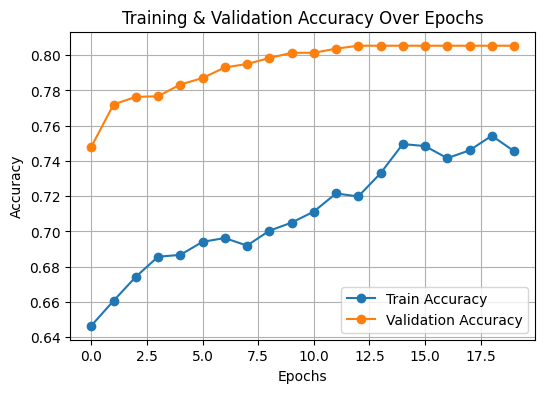

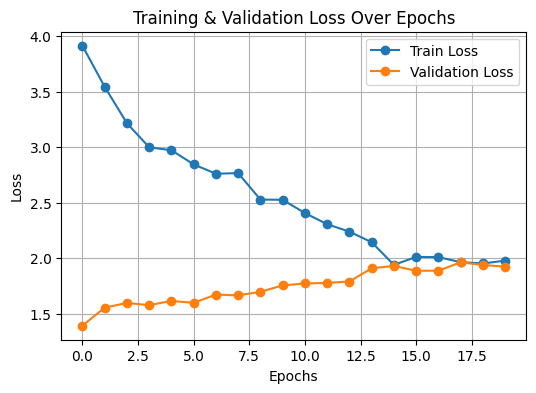

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2

# Load the dataset (Replace 'churn_data.csv' with your actual dataset file)
df = pd.read_csv("/content/Churn_Modelling.csv")

# Drop unnecessary columns
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

# Encode categorical variables
label_encoders = {}
for column in ["Geography", "Gender"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Splitting features and target variable
X = df.drop(columns=["Exited"])  # Features
y = df["Exited"]  # Target (Churn)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build ANN model with Regularization
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),  # L2 Regularization
    Dropout(0.3),  # Dropout to prevent overfitting
    BatchNormalization()  # Normalize inputs for stability
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# **Visualization**

# 1️⃣ Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 2️⃣ Training & Validation Accuracy Plot
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label="Train Accuracy", marker='o')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()

# 3️⃣ Training & Validation Loss Plot
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label="Train Loss", marker='o')
plt.plot(history.history['val_loss'], label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()
